In [1]:
#set up dependencies
import pandas as pd
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Generate Cities List

In [2]:
#create list of 500+ random cities

#create random coordinates
lat_list = np.random.uniform(-90.00, 90.00, 1500)
lng_list = np.random.uniform(-180.00, 180.00, 1500)

#combine list to create coodinates
coords_list = list(zip(lat_list, lng_list))

In [3]:
#set up lists for finding cities using citipy
cities = []
countries = []

for coords in coords_list:
    
    city = citipy.nearest_city(coords[0], coords[1]).city_name
    country = citipy.nearest_city(coords[0], coords[1]).country_code
    
    if city not in cities:
        cities.append(city)

len(cities)

607

## Perform API Calls

In [4]:
#perform API calls through OpenWeatherMap API

#create function to extract data from API:
def extract_data(data):
    return {
        "name" : data["name"],
        "lat" : data["coord"]["lat"],
        "lng" : data["coord"]["lon"],
        "max_temp_f" : data["main"]["temp_max"],
        "humidity" : data["main"]["humidity"],
        "cloudiness" : data["clouds"]["all"],
        "windspeed" : data["wind"]["speed"],
        "country" : data["sys"]["country"],
        "date" : data["dt"]
    }

In [5]:
#request data from OpenWeatherMay API calls

#create empty list for appending extracted data
city_results = []

#set beginning print statments for output
print("Beginning Data Retrieval")
print("-" * 30)

#set up record counter for output
record_counter = 1

#create for loop to loop over random city list
for i, city in enumerate(cities):
    
    #set up record counter for print log
    if i > 600:
        record_counter += 1
    
    #set up request and include try/except
    try:
        print(f"Processing Record {record_counter} | {city}")
        
        record_counter += 1
        
        data = requests.get(url = "http://api.openweathermap.org/data/2.5/weather", params = {
            "q": city,
            "appid": weather_api_key,
            "units": "imperial"
        }).json()
    
        cities_result = extract_data(data)
    
        city_results.append(cities_result)
        
    except KeyError:
        print("City Not Found. Skipping ...")
        pass
    
print("-" * 30)
print("Data Retrieval Complete")
print("-" * 30)

Beginning Data Retrieval
------------------------------
Processing Record 1 | kautokeino
Processing Record 2 | east london
Processing Record 3 | vaini
Processing Record 4 | cape town
Processing Record 5 | fort nelson
Processing Record 6 | mataura
Processing Record 7 | hoquiam
Processing Record 8 | hermanus
Processing Record 9 | hobart
Processing Record 10 | rikitea
Processing Record 11 | belushya guba
City Not Found. Skipping ...
Processing Record 12 | sao filipe
Processing Record 13 | albany
Processing Record 14 | kamaishi
Processing Record 15 | catuday
Processing Record 16 | karratha
Processing Record 17 | suez
Processing Record 18 | petrovsk-zabaykalskiy
Processing Record 19 | dudinka
Processing Record 20 | san patricio
Processing Record 21 | ribeira grande
Processing Record 22 | arraial do cabo
Processing Record 23 | ekimchan
Processing Record 24 | pagudpud
Processing Record 25 | noumea
Processing Record 26 | castro
Processing Record 27 | grand gaube
Processing Record 28 | salalah


## Convert Raw Data to a Dataframe

In [6]:
#convert data to a data frame
city_df = pd.DataFrame(city_results)

#export df to CSV
city_df.to_csv("cities_data.csv", index=False)

#show dataframe
city_df

,name,lat,lng,max_temp_f,humidity,cloudiness,windspeed,country,date
0,Kautokeino,69.01,23.04,44.49,87,100,25.30,NO,1600891434
1,East London,-33.02,27.91,67.75,53,12,2.42,ZA,1600891394
2,Vaini,-21.20,-175.20,71.60,94,20,9.17,TO,1600891434
3,Cape Town,-33.93,18.42,59.00,93,75,12.75,ZA,1600891146
4,Fort Nelson,58.81,-122.70,50.00,81,75,2.24,CA,1600891434
...,...,...,...,...,...,...,...,...,...
549,Kitgum,3.28,32.89,67.66,88,86,4.45,UG,1600891565
550,Chengde,40.97,117.94,56.28,88,100,1.66,CN,1600891565
551,Peñarroya-Pueblonuevo,38.30,-5.27,75.20,57,91,3.36,ES,1600891565
552,Vanimo,-2.67,141.30,76.42,87,100,3.15,PG,1600891389


## Plotting Weather Data

### Latitude vs. Temperature

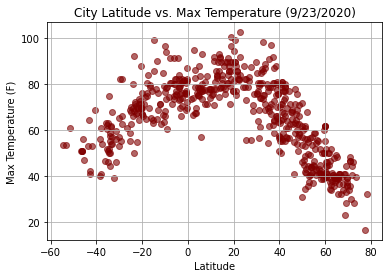

In [7]:
#create variables for plotting
lat = city_df["lat"]
temp = city_df["max_temp_f"]

plt.scatter(lat, temp, color="maroon", alpha=0.6)
plt.title("City Latitude vs. Max Temperature (9/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Images/max_temp_plot.png")
plt.show()

#### The scatter plot above analyzes the maximum temperate of over 500 random cities vs each citys respective latitude. This graph show that cities closer to the equator (latitude of 0) have higher max temperatures.

### Latitude vs. Humidity

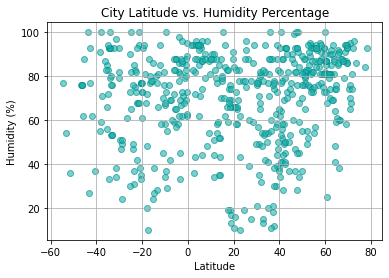

In [33]:
#create variables for plotting
humidity = city_df["humidity"]

#build scatter plot
plt.scatter(lat, humidity, color="lightseagreen", edgecolors="darkcyan", alpha=0.6)
plt.title("City Latitude vs. Humidity Percentage")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/humidity_plot.png")
plt.show()

#### The scatter plot above analyzes the humidity percentage vs latitude for 500 random cities. The data does not immediately show a correlation with humidity and latitude. High humidity appears across all latitude points with large clusters around 0 degrees latitude and 60 degrees latitdue in cities that have around 80% humidity. 

### Latitude vs. Cloudiness

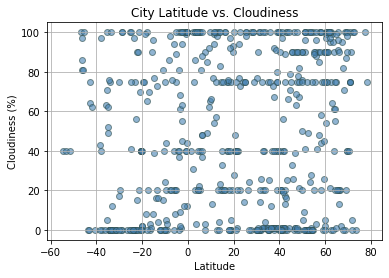

In [34]:
#create variables for plotting
cloudiness = city_df["cloudiness"]

#build scatter plot
plt.scatter(lat, cloudiness, color="steelblue", edgecolors="darkslategray", alpha=0.6)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/cloudiness_plot.png")
plt.show()

#### The scatter plot above analyzes the cloudiness percentage vs latitude for 500 random cities. When compared across latitude, cloudiness percentage appears to be dispersed across the entire percentage range for all latitudes. Cloudiness does not immediatly show a correlation when compared to latitude. 

### Latitude vs. Wind Speed

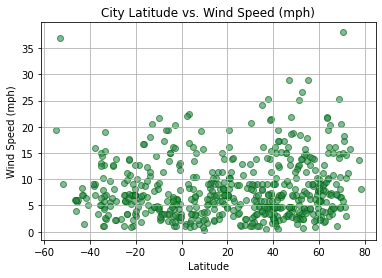

In [35]:
#create variables for plotting
wind_speed = city_df["windspeed"]

#build scatter plot
plt.scatter(lat, wind_speed, color="seagreen", edgecolors="darkgreen", alpha=0.6)
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/windspeed_plot.png")
plt.show()

#### The above scatter plot analyzes wind speed for over 500 random cities vs the respective latitude for each city. The data show that across all latitude points, most cities have wind speeds under 10 mph and the overall majority have wind speeds under 30 mph. There are two extreme outliers of cities with wind speed above 50 mph around 70 degrees and -65 degrees latitude. 

In [11]:
#create northern and southern hemispheres for plotting. 
southern_hem = city_df[city_df["lat"] < 0]
northern_hem = city_df[city_df["lat"] >= 0]

#create lat variables to use for each plot category
southern_lat = southern_hem["lat"]
northern_lat = northern_hem["lat"]

## Linear Regression

### Northern Hemisphere - Temperature (F) vs. Latitude

In [12]:
#create variables for plotting
northern_temp = northern_hem["max_temp_f"]

#create x and y for training the model
X_NT = [[e] for e in northern_lat]
y_nt = northern_temp

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_NT, y_nt)

#create predict funtion for plotting
def predict_function_nt(northern_lat):
    return model.predict([[northern_lat]])[0]

#create range and predict for plotting
x_range_nt = np.arange(min(northern_lat), max(northern_lat), 0.01)
predict_northern_temp = [predict_function_nt(e) for e in x_range_nt]

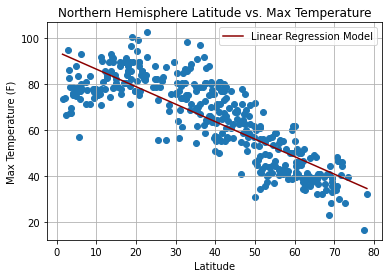

In [36]:
#create plot
plt.scatter(northern_lat, northern_temp)
plt.title("Northern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.plot(x_range_nt, predict_northern_temp, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/northern_maxtemp_plot.png")
plt.show()

#### The northern hemisphere latitude vs max temperature plot reflects that cities closer to the equator (latitude 0) have higher max temperatures. The linear regression model appears to somewhat predicict that the further away from the equator but without great precision. This may be due to the curve of the max temperatures for cities at the equator. 

### Southern Hemisphere - Temperature (F) vs. Latitude

In [15]:
#create variables for plotting
southern_temp = southern_hem["max_temp_f"]

#create x and y for training the model
X_ST = [[e] for e in southern_lat]
y_st = southern_temp

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_ST, y_st)

#create predict funtion for plotting
def predict_function_st(southern_lat):
    return model.predict([[southern_lat]])[0]

#create range and predict for plotting
x_range_st = np.arange(min(southern_lat), max(southern_lat), 0.01)
predict_southern_temp = [predict_function_st(e) for e in x_range_st]

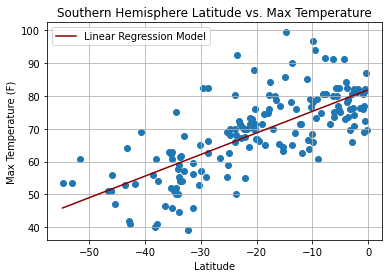

In [37]:
#create plot
plt.scatter(southern_lat, southern_temp)
plt.title("Southern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.plot(x_range_st, predict_southern_temp, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/southern_maxtemp_plot.png")
plt.show()

#### The southern hemisphere latitude vs max temperature plot similarly shows that cities closer to the equator have higher max temperatures, while cities further from the equator have lower max temperatures. The linear regression model appears to fit the data evenly, however there does appear to be many outliers. 

### Northern Hemisphere - Humidity (%) vs. Latitude

In [18]:
#create variables for plotting
northern_humidity = northern_hem["humidity"]

#create x and y for training the model
X_NH = [[e] for e in northern_lat]
y_nh = northern_humidity

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_NH, y_nh)

#create predict funtion for plotting
def predict_function_nh(northern_lat):
    return model.predict([[northern_lat]])[0]

#create range and predict for plotting
x_range_nh = np.arange(min(northern_lat), max(northern_lat), 0.01)
predict_northern_humidity = [predict_function_nh(e) for e in x_range_nh]

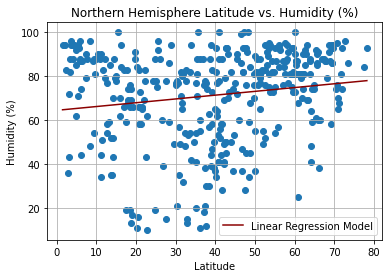

In [38]:
#create plot
plt.scatter(northern_lat, northern_humidity)
plt.title("Northern Hemisphere Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.plot(x_range_nh, predict_northern_humidity, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/northern_humidity_plot.png")
plt.show()

#### The northern hemisphere latitude plot vs humidity shows there is some positive regression but this may be skewed due to a larger cluster of cities with high humidity between 50 and 70 percent latitude. Given that the data is widely dispersed within each latitude, the model does not appear to accurately predict humidity levels. 

### Southern Hemisphere - Humidity (%) vs. Latitude

In [21]:
#create variables for plotting
southern_humidity = southern_hem["humidity"]

#create x and y for training the model
X_SH = [[e] for e in southern_lat]
y_sh = southern_humidity

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_SH, y_sh)

#create predict funtion for plotting
def predict_function_sh(southern_lat):
    return model.predict([[southern_lat]])[0]

#create range and predict for plotting
x_range_sh = np.arange(min(southern_lat), max(southern_lat), 0.01)
predict_southern_humidity = [predict_function_sh(e) for e in x_range_sh]

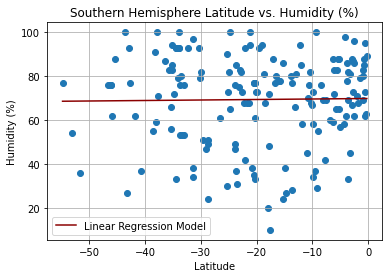

In [39]:
#create plot
plt.scatter(southern_lat, southern_humidity)
plt.title("Southern Hemisphere Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.plot(x_range_sh, predict_southern_humidity, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/southern_humidity_plot.png")
plt.show()

#### The southern hemisphere latitude vs humidity does not show correlation between latitude and humidity. While it appears there are more cities with higher humidity, the data is very dispersed within all latitude points. 

### Northern Hemisphere - Cloudiness (%) vs. Latitude

In [24]:
#create variables for plotting
northern_cloudiness = northern_hem["cloudiness"]

#create x and y for training the model
X_NC = [[e] for e in northern_lat]
y_nc = northern_cloudiness

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_NC, y_nc)

#create predict funtion for plotting
def predict_function_nc(northern_lat):
    return model.predict([[northern_lat]])[0]

#create range and predict for plotting
x_range_nc = np.arange(min(northern_lat), max(northern_lat), 0.01)
predict_northern_cloudiness = [predict_function_nc(e) for e in x_range_nc]

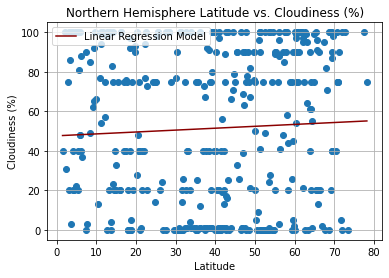

In [40]:
#create plot
plt.scatter(northern_lat, northern_cloudiness)
plt.title("Northern Hemisphere Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.plot(x_range_nc, predict_northern_cloudiness, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/northern_cloudiness_plot.png")
plt.show()

#### The northern hemisphere latitude vs cloudiness data is widely dispersed across both axes. The data show that the model does not accurately predict cloudiness percentage for latitude. 

### Southern Hemisphere - Cloudiness (%) vs. Latitude

In [27]:
#create variables for plotting
southern_cloudiness = southern_hem["cloudiness"]

#create x and y for training the model
X_SC = [[e] for e in southern_lat]
y_sc = southern_cloudiness

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_SC, y_sc)

#create predict funtion for plotting
def predict_function_sc(southern_lat):
    return model.predict([[southern_lat]])[0]

#create range and predict for plotting
x_range_sc = np.arange(min(southern_lat), max(southern_lat), 0.01)
predict_southern_cloudiness = [predict_function_sc(e) for e in x_range_sc]

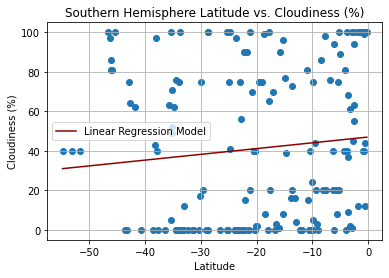

In [41]:
#create plot
plt.scatter(southern_lat, southern_cloudiness)
plt.title("Southern Hemisphere Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.plot(x_range_sc, predict_southern_cloudiness, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/southern_cloudiness_plot.png")
plt.show()

#### Similarly to the northern hemisphere, the southern hemishphere latitude vs. cloudiness data is widely dispersed over the plot. The linear regression model does not appear to accurately predict cloudiness across latitude in the souther hemisphere. 

### Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [42]:
#create variables for plotting
northern_wind_speed = northern_hem["windspeed"]

#create x and y for training the model
X_NW = [[e] for e in northern_lat]
y_nw = northern_wind_speed

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_NW, y_nw)

#create predict funtion for plotting
def predict_function_nw(northern_lat):
    return model.predict([[northern_lat]])[0]

#create range and predict for plotting
x_range_nw = np.arange(min(northern_lat), max(northern_lat), 0.01)
predict_northern_wind_speed = [predict_function_nw(e) for e in x_range_nw]

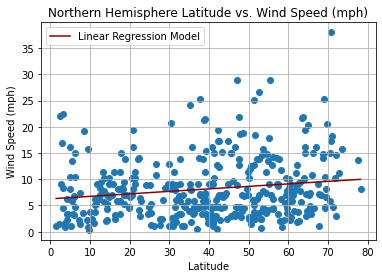

In [43]:
#create plot
plt.scatter(northern_lat, northern_wind_speed)
plt.title("Northern Hemisphere Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.plot(x_range_nw, predict_northern_wind_speed, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/northern_windspeed_plot.png")
plt.show()

#### The nothern hemisphere latitude vs wind speed plt shows that the majority of cities have wind speeds below 10 mph. The linear regression model appears to somewhat fit as it sits between 5 and 10 mph, however the data is widely dispered across the x axis with many cities having a wind speed under 5 mph. The model may give a general prediction but it's not entirely accurate. 

### Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [44]:
#create variables for plotting
southern_wind_speed = southern_hem["windspeed"]

#create x and y for training the model
X_SW = [[e] for e in southern_lat]
y_sw = southern_wind_speed

#estabish model
model = LinearRegression()

#fit and train the model
model.fit(X_SW, y_sw)

#create predict funtion for plotting
def predict_function_sw(southern_lat):
    return model.predict([[southern_lat]])[0]

#create range and predict for plotting
x_range_sw = np.arange(min(southern_lat), max(southern_lat), 0.01)
predict_southern_windspeed = [predict_function_sw(e) for e in x_range_sw]

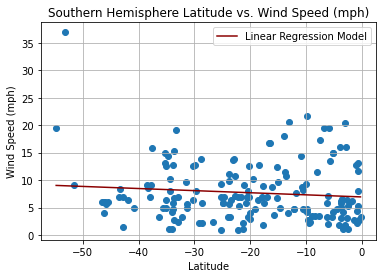

In [45]:
#create plot
plt.scatter(southern_lat, southern_wind_speed)
plt.title("Southern Hemisphere Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.plot(x_range_sw, predict_southern_windspeed, color="darkred", label="Linear Regression Model")
plt.legend()
plt.savefig("Images/southern_windspeed_plot.png")
plt.show()

#### Similar to the northern hemisphere, the southern hemisphere latitude vs wind speed data is widely dispersed. The linear regression model somewhat fits but not accurately due to dispersion and outliers. 